In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV
from joblib import dump, load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [18]:
data = pd.read_csv("training_data_with_player_direction.csv")

C:\Users\Tad\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (389) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
# Transform Positions
data_transformed = data
data_transformed['play_direction_numerical'] = 1
data_transformed.loc[data_transformed['playDirection'] == 'left', 'play_direction_numerical'] = -1
delta_cols = []
for var_type in ['x', 'y', 's', 'a', 'dir', 'dis', 'o']: # note that magnitude vars (like speed and acceleration) are omitted.
    for pos in ['LT', 'LG', 'C', 'RG', 'RT']:
        col_name = var_type + "_0_" + pos
        for time in range(1, 11): # exclude 0, include 1.0
            time = round(time * 0.1, 1) # working with decimals
            time_str = str(time)
            if time == 1:
                time_str = '1'
            col_name = var_type + "_" + str(time_str) + "_" + pos
            print(col_name)
            prev_time = round(time - 0.1, 1)
            prev_time_str = str(prev_time)
            if prev_time == 0:
                prev_time_str = '0' # not '0.0'
            prev_time_col_name = var_type + "_" + str(prev_time_str) + "_" + pos
            delta_col_name = 'delta_' + col_name
            delta_cols.append(col_name) # REMOVE... FLAG
            delta_cols.append(delta_col_name)
            data_transformed[delta_col_name] = (data_transformed[col_name] - data_transformed[prev_time_col_name]) * data_transformed['play_direction_numerical']

# data_transformed.to_csv("data_transformed.csv")
# data_transformed[['x_0.1_LT', 'x_0_LT', 'delta_x_0.1_LT', 'playDirection']] # quick check

<ipython-input-19-0efac18b64be>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_transformed[delta_col_name] = (data_transformed[col_name] - data_transformed[prev_time_col_name]) * data_transformed['play_direction_numerical']


x_0.1_LT
x_0.2_LT
x_0.3_LT
x_0.4_LT
x_0.5_LT
x_0.6_LT
x_0.7_LT
x_0.8_LT
x_0.9_LT
x_1_LT
x_0.1_LG
x_0.2_LG
x_0.3_LG
x_0.4_LG
x_0.5_LG
x_0.6_LG
x_0.7_LG
x_0.8_LG
x_0.9_LG
x_1_LG
x_0.1_C
x_0.2_C
x_0.3_C
x_0.4_C
x_0.5_C
x_0.6_C
x_0.7_C
x_0.8_C
x_0.9_C
x_1_C
x_0.1_RG
x_0.2_RG
x_0.3_RG
x_0.4_RG
x_0.5_RG
x_0.6_RG
x_0.7_RG
x_0.8_RG
x_0.9_RG
x_1_RG
x_0.1_RT
x_0.2_RT
x_0.3_RT
x_0.4_RT
x_0.5_RT
x_0.6_RT
x_0.7_RT
x_0.8_RT
x_0.9_RT
x_1_RT
y_0.1_LT
y_0.2_LT
y_0.3_LT
y_0.4_LT
y_0.5_LT
y_0.6_LT
y_0.7_LT
y_0.8_LT
y_0.9_LT
y_1_LT
y_0.1_LG
y_0.2_LG
y_0.3_LG
y_0.4_LG
y_0.5_LG
y_0.6_LG
y_0.7_LG
y_0.8_LG
y_0.9_LG
y_1_LG
y_0.1_C
y_0.2_C
y_0.3_C
y_0.4_C
y_0.5_C
y_0.6_C
y_0.7_C
y_0.8_C
y_0.9_C
y_1_C
y_0.1_RG
y_0.2_RG
y_0.3_RG
y_0.4_RG
y_0.5_RG
y_0.6_RG
y_0.7_RG
y_0.8_RG
y_0.9_RG
y_1_RG
y_0.1_RT
y_0.2_RT
y_0.3_RT
y_0.4_RT
y_0.5_RT
y_0.6_RT
y_0.7_RT
y_0.8_RT
y_0.9_RT
y_1_RT
s_0.1_LT
s_0.2_LT
s_0.3_LT
s_0.4_LT
s_0.5_LT
s_0.6_LT
s_0.7_LT
s_0.8_LT
s_0.9_LT
s_1_LT
s_0.1_LG
s_0.2_LG
s_0.3_LG
s_0.4_LG
s_0.5_LG
s_0.6_L

In [20]:
# Principal Component Analysis
cols_of_interest = ['action_time'] + delta_cols
data_all = data_transformed.dropna()
data = data_all.select_dtypes(['number'])
data = data[cols_of_interest]
x = data.loc[:, data.columns != 'action_time']
y = data['action_time']
num_comps = 90
pca = PCA(n_components = num_comps)
print("pca fitting")
principal_components = pca.fit_transform(x)
principal_components_df = pd.DataFrame(principal_components)
print(principal_components_df)
# principal_components_df.to_csv("35_principal_components_time_to_throw.csv")

pca fitting
              0           1           2           3           4           5   \
0     868.607694  170.723836  -33.025768  -91.096632  -51.952163   85.625162   
1    -917.018008 -103.590098  -78.665461  322.718541  -53.512374  -30.220803   
2    -956.541357 -108.178348 -121.515716   80.147410   70.488952  -32.939451   
3    -544.477735  573.917217  -56.195752  -50.887473 -231.925068  -92.513790   
4    -953.748711   -9.724303  -22.134815  -53.897108  -41.948120  -16.051805   
...          ...         ...         ...         ...         ...         ...   
1115  632.787080 -216.687162 -266.290442 -188.619517 -111.102767  503.091121   
1116  911.667071   82.349854   80.140928 -181.009907  -54.197302   32.667975   
1117  773.352134  -59.923215  -66.232243 -117.044884   35.962077   48.973042   
1118  896.873272   37.439145   65.061219 -100.195264  -43.350418  -14.969777   
1119 -690.359925  143.598262 -222.798351 -161.304096  -67.202532  -36.772448   

              6          7 

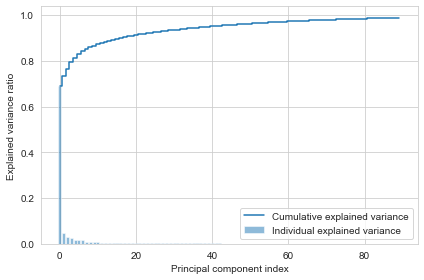

In [21]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [22]:
print(data['x_0.2_LT'])

0        41.14
1       109.62
2        78.33
3        50.64
4        55.86
         ...  
1115     28.56
1116     27.96
1117     41.34
1118     41.00
1119     41.89
Name: x_0.2_LT, Length: 1120, dtype: float64


In [23]:
pca_corr_cols = ['principal_component'] + cols_of_interest
print(data.columns)
print(principal_components_df.columns)
pca_correlations = pd.DataFrame(columns = pca_corr_cols)
counter = 0
for col in cols_of_interest:
    counter = counter + 1
    print(counter)
    entry = [col]
    for pc in range(num_comps):
        correlation = np.corrcoef(data[col], principal_components_df[pc], rowvar = False)
        entry.append(correlation)
    entry = pd.Series(entry)
    #pca_correlations = pca_correlations.append(entry)
    pca_correlations = pd.concat([pca_correlations, entry], axis = 1)


Index(['action_time', 'x_0.1_LT', 'delta_x_0.1_LT', 'x_0.2_LT',
       'delta_x_0.2_LT', 'x_0.3_LT', 'delta_x_0.3_LT', 'x_0.4_LT',
       'delta_x_0.4_LT', 'x_0.5_LT',
       ...
       'o_0.6_RT', 'delta_o_0.6_RT', 'o_0.7_RT', 'delta_o_0.7_RT', 'o_0.8_RT',
       'delta_o_0.8_RT', 'o_0.9_RT', 'delta_o_0.9_RT', 'o_1_RT',
       'delta_o_1_RT'],
      dtype='object', length=701)
RangeIndex(start=0, stop=90, step=1)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
17

In [24]:
print(pca_correlations)

   principal_component action_time x_0.1_LT delta_x_0.1_LT x_0.2_LT  \
0                  NaN         NaN      NaN            NaN      NaN   
1                  NaN         NaN      NaN            NaN      NaN   
2                  NaN         NaN      NaN            NaN      NaN   
3                  NaN         NaN      NaN            NaN      NaN   
4                  NaN         NaN      NaN            NaN      NaN   
..                 ...         ...      ...            ...      ...   
86                 NaN         NaN      NaN            NaN      NaN   
87                 NaN         NaN      NaN            NaN      NaN   
88                 NaN         NaN      NaN            NaN      NaN   
89                 NaN         NaN      NaN            NaN      NaN   
90                 NaN         NaN      NaN            NaN      NaN   

   delta_x_0.2_LT x_0.3_LT delta_x_0.3_LT x_0.4_LT delta_x_0.4_LT  ...  \
0             NaN      NaN            NaN      NaN            NaN  ...   

In [25]:
# Prep Train and Test Data
label = data['action_time']
principal_components_df['action_time'] = label
X = data.loc[:, data.columns != 'action_time']
y = data['action_time']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("completed train-test split")

completed train-test split


In [26]:
print(datetime.now())
random_grid = { # FLAG
    'bootstrap': [True, False],
    'max_depth': [5, 10, 20, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [3, 5, 10],
    'min_samples_split': [3, 5, 15],
    'n_estimators': [250, 500, 1000, 2000],
}

rf_tuning = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf_tuning, param_distributions = random_grid, n_iter = 30, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)
rf_fit_output = rf_random.fit(x_train, y_train)
print(datetime.now())

2022-12-15 12:16:43.328405
Fitting 3 folds for each of 30 candidates, totalling 90 fits
2022-12-15 12:18:23.771978


In [27]:
rf_tuned = rf_fit_output.best_estimator_
rf_tuned.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='log2',
                      min_samples_leaf=3, min_samples_split=15,
                      n_estimators=500)

In [28]:
# Use the forest's predict method on the test data
predictions = rf_tuned.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print('MSE: ', mean_squared_error(y_test, predictions))
print('R^2: ', rf_tuned.score(x_test, y_test))

Mean Absolute Error: 0.81 degrees.
Accuracy: 71.36 %.
MSE:  1.6076212708870645
R^2:  0.1411852979629159


In [ ]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    rf_tuned, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=cols_of_interest)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
# Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot# Pull out one tree from the forest
# tree = rf_tuned.estimators_[5]# Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot# Pull out one tree from the forest
# tree = rf_tuned.estimators_[5]# Export the image to a dot file
# features = [col for col in data.columns if col != 'action_time']
# export_graphviz(tree, out_file = 'tree.dot', feature_names = features, rounded = True, precision = 1)# Use dot file to create a graph
# (graph, ) = pydot.graph_from_dot_file('tree.dot')# Write graph to a png file
# # print(graph)
# graph.write_png('tree.png')

In [32]:
print(datetime.now())
random_grid = { # FLAG
    'bootstrap': [True, False],
    'max_depth': [5, 10, 20, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [3, 5, 10],
    'min_samples_split': [3, 5, 15],
    'n_estimators': [250, 500, 1000, 2000],
}

rf_tuning = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf_tuning, param_distributions = random_grid, n_iter = 30, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)
rf_fit_output = rf_random.fit(x_train, y_train)
print(datetime.now())

2022-12-14 23:06:39.238411
Fitting 3 folds for each of 30 candidates, totalling 90 fits
2022-12-14 23:07:12.106515


In [33]:
rf_tuned = rf_fit_output.best_estimator_
rf_tuned.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='log2',
                      min_samples_leaf=3, min_samples_split=5,
                      n_estimators=1000)

In [35]:
# Use the forest's predict method on the test data
predictions = rf_tuned.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print('MSE: ', mean_squared_error(y_test, predictions))
print('R^2: ', rf_tuned.score(x_test, y_test))

Mean Absolute Error: 0.81 degrees.
Accuracy: 71.43 %.
MSE:  1.5824986239212202
R^2:  0.15460618194789155
[[-3.46784289e-03  4.26333502e-08 -3.52575599e-03 ...  3.67989131e-03
  -1.05105931e-01  3.95560557e-03]
 [-8.38018167e-03 -4.24968199e-06 -8.40598985e-03 ...  2.59074849e-03
   7.38715626e-02  1.55315080e-03]
 [-1.63908329e-02  8.73384743e-06 -1.64169417e-02 ... -3.17246158e-03
   2.20350728e-02 -7.18268397e-03]
 ...
 [ 1.28226021e-04 -2.33047208e-05  9.56083943e-06 ...  1.45316633e-02
  -7.32931631e-03 -7.17683285e-02]
 [ 1.31646165e-04 -2.43261524e-06  1.30688347e-04 ... -9.51063654e-04
   6.03853319e-02  4.91686918e-03]
 [ 4.37423107e-04 -1.25440165e-05  4.62265968e-04 ...  9.90255337e-03
   1.25882129e-02 -4.23331096e-02]]


In [13]:
# Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot# Pull out one tree from the forest
# tree = rf_tuned.estimators_[5]# Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot# Pull out one tree from the forest
# tree = rf_tuned.estimators_[5]# Export the image to a dot file
# features = [col for col in data.columns if col != 'action_time']
# export_graphviz(tree, out_file = 'tree.dot', feature_names = features, rounded = True, precision = 1)# Use dot file to create a graph
# (graph, ) = pydot.graph_from_dot_file('tree.dot')# Write graph to a png file
# # print(graph)
# graph.write_png('tree.png')

FileNotFoundError: [Errno 2] "dot" not found in path.

In [ ]:
test_set_with_predictions = pd.DataFrame(columns = {'actual': y_test, 'predicted': predictions})
test_set_with_predictions['actual'] = y_test
test_set_with_predictions['predicted'] = predictions
test_set_with_predictions.to_csv("test_set_with_predictions.csv")
#for i in range(len(y_test)):
#    print(y_test[i], predictions[i])